# Определение закономерностей для успешности игры

**Описание проекта**

Задание предлагает нам возможность почувствовать себя в роли сотрудника интернет-магазина "Стримчик". Мне из открытых данных известны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные за 2016 год, т.о нам нужно найти некие закономерности чтобы определить дальнейшее развитие компании в 2017 году. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

1. [Открытие данных](#step1)
2. [Подготовка данных](#prep_data)
3. [Исследовательский анализ данных](#research_data)
4. [Составление портрета пользователя каждого региона](#portrait)
5. [Проверка гипотез](#check_hypo)
6. [Общий вывод](#common_out)

<a id='step_1'></a>

# Шаг 1: Открытие файла  и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score        True
User_Score          True
Rating              True
dtype: bool

In [6]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Ссылка на источник данных с обозначением различных ESRB

[Cслыка 1](https://www.esrb.org/ratings-guide/)
[Ссылка 2](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

## Вывод по Шаг_1

Видно, что в данных есть нули причём колонка `Name` содержит всего 2 нулевых позиции, надо обязательно на них посмотреть. Также видно что колонка `User_score` содержит данные в неправильном типе => нужно заменить на float64.
Также можно заметить что в ячейке `Rating` устаревшие данные так согласно источникам K-A это старая версия нынешней E. Таким образом понимаем что нужно найти логичные замены для NaN изменить типы данных и заменить значения в колонках нужные, чем собственно и займемся в следующем раздделе (Шаг 2.)

<a id = 'prep_data'></a>
# Шаг 2: Подготовка данных

### Перевод строк к нижнему регистру

Первое с чего начнем это с того что приведем все имена колонок к нижнему регистру. Так будет удобнее к ним обращаться

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Обработка колонки `year_of_release`

Заменяем NaN в колонке `year_of_release`, которую я заполнил годом в зависимости от платформы, ведь в зависимости от того на какую платформу была выпущена игра, тогда и год выпуска будет ограничен самим сроком службы платформы на которую игры была выпущена. Также произведем замену типа колонки на int64, потому что мне не нравится что ноль стоит рядом с годом)) Также и на графиках это выглядит некрасиво

In [9]:
df.loc[:, 'year_of_release'] = df.loc[:, 'year_of_release'].fillna(
    df.groupby('platform')['year_of_release'].transform('median')
)

In [10]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df['year_of_release'] = df['year_of_release'].astype('int64')

### Обработка колонки `name`

Посмотрим на данные из `name` соответвующие NaN

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Скинем эти данные ибо в них вообще почти нет данных и вряд ли они как то исказят данные если их убрать

In [13]:
df = df.dropna(subset=['name'])

### Обработка колонки `critic_score`

Заменяем `critic_score` на нужный тип и заполняем пропущенные значения. Для этого я создаю колонку `sum_sales` чтобы понять влияет ли кол-во суммарных продаж на оценку критиков

In [14]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

Делим данные по 25,50 и 75 квартилям чтобы разделить суммарные продажи на 3 категории

In [15]:
print(df['sum_sales'].quantile(q=0.25), df['sum_sales'].quantile(q=0.5), df['sum_sales'].quantile(q=0.75))

0.06 0.16999999999999998 0.47


In [16]:
def type(row):
    sales = row['sum_sales']
    if sales <= 0.17:
        return "Низкий"
    elif sales > 0.17 and sales <= 0.47:
        return "Средний"
    else:
        return "Высокий"

In [17]:
df['type_by_sum_sales'] = df.apply(type, axis=1)

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,type_by_sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,Высокий
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Высокий
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Высокий
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,Высокий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Низкий
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,Низкий
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Низкий
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,Низкий


In [19]:
df.groupby('type_by_sum_sales')['critic_score'].median().sort_values()

type_by_sum_sales
Низкий     66.0
Средний    69.0
Высокий    78.0
Name: critic_score, dtype: float64

Видно что в среднем есть зависимость от рейтинга выставленного критиками игры и ее сборов

In [20]:
df.loc[:, 'critic_score'] = df.loc[:, 'critic_score'].fillna(
    df.groupby('type_by_sum_sales')['critic_score'].transform('median'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release    16713 non-null  int64  
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       16713 non-null  float64
 9   user_score         10014 non-null  object 
 10  rating             9949 non-null   object 
 11  sum_sales          16713 non-null  float64
 12  type_by_sum_sales  16713 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


### Обработка колонки `user_score`

Сначала посмотрим на значения NaN в колонке `user_score`

In [22]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,type_by_sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,78.0,NaN,NaN,40.24,Высокий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,78.0,NaN,NaN,31.38,Высокий
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,78.0,NaN,NaN,30.26,Высокий
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,78.0,NaN,NaN,28.31,Высокий
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,78.0,NaN,NaN,24.67,Высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.0,NaN,NaN,0.01,Низкий
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66.0,NaN,NaN,0.01,Низкий
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN,0.01,Низкий
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.0,NaN,NaN,0.01,Низкий


In [23]:
df[df['user_score'].isna()]['type_by_sum_sales'].value_counts()

Низкий     4042
Средний    1419
Высокий    1238
Name: type_by_sum_sales, dtype: int64

In [24]:
df[df['user_score'].isna()]['rating'].isna().sum()

6628

In [25]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,type_by_sum_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,78.0,tbd,E,6.70,Высокий
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97,Высокий
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,78.0,tbd,T,2.81,Высокий
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42,Высокий
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40,Высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01,Низкий
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01,Низкий
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01,Низкий
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,66.0,tbd,E,0.01,Низкий


In [26]:
df[df['user_score'] == 'tbd']["type_by_sum_sales"].value_counts()

Низкий     1664
Средний     558
Высокий     202
Name: type_by_sum_sales, dtype: int64

In [27]:
df[df['user_score'] == 'tbd']['rating'].isna().sum()

50

Итак видно, что в колонке `user_score` есть значения tbd которые обозначаю to be determined, что означает что позже скоры сформируются. Если обрезать таблицу по этому значению(tbd) то у нас есть рейтинги а в колонке с NaN, у нас эти рейтинги отсутсвуют. Какая то должна быть между этими вещами связь. Возможно так как данные из открытых источников, то пишут их люди, а списки эти не автоматически как то генерируются. Достаточно логично, что в каких то участках значения не будут заполняться и будет появляться NAN в колонке `user_score` и `rating`, а если за описание этих данных взялись то заполняют сразу обе колонки `user_score` и `rating`. Поэтому мне кажется что можно заполнить и tbd и NaN средними значениями по колонке.



Мне стало интересно возможно получилось так что очень много фильмов категории E и их уже просто устали вбивать) Я поискал данные и нашел [данные](https://www.esrb.org/blog/e-for-everyone-continues-to-be-most-frequently-assigned-video-game-rating/) о том что среди всех видеоигр, E занимает лидирующую позицию, но как написано по ссылке, занимает это значение 49 % следовательно возможно стоит посмотреть может при замене NAN на E в колонке `user_score`

In [28]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [29]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [30]:
df['user_score'] = df['user_score'].fillna(0)

In [31]:
df['user_score'] = df['user_score'].astype('float64')

In [32]:
df[df['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,type_by_sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,78.0,0.0,NaN,40.24,Высокий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,78.0,0.0,NaN,31.38,Высокий
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,78.0,0.0,NaN,30.26,Высокий
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,78.0,0.0,NaN,28.31,Высокий
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,78.0,0.0,NaN,24.67,Высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.0,0.0,NaN,0.01,Низкий
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66.0,0.0,NaN,0.01,Низкий
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,0.0,NaN,0.01,Низкий
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.0,0.0,NaN,0.01,Низкий


In [33]:
df[df['user_score'] != 0 ].groupby('type_by_sum_sales')['user_score'].median()

type_by_sum_sales
Высокий    7.7
Низкий     7.3
Средний    7.4
Name: user_score, dtype: float64

Видна зависимости типа суммы продаж от от выставленных юзерами оценок, заполним NaN осознавая этот факт

In [34]:
df['user_score'].replace(0, np.nan, inplace=True)

In [35]:
df['user_score'] = df['user_score'].fillna(df.groupby('type_by_sum_sales')['user_score'].transform('median'))

In [36]:
df['user_score']

0        8.0
1        7.7
2        8.3
3        8.0
4        7.7
        ... 
16710    7.3
16711    7.3
16712    7.3
16713    7.3
16714    7.3
Name: user_score, Length: 16713, dtype: float64

### Обработка колонки `rating`

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release    16713 non-null  int64  
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       16713 non-null  float64
 9   user_score         16713 non-null  float64
 10  rating             9949 non-null   object 
 11  sum_sales          16713 non-null  float64
 12  type_by_sum_sales  16713 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


In [38]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Из [википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) следует что K-A эквивалентна E => будем заменять K-A на E из колонки `rating`, т.к К-А это старое обозначение E

**Заменяем K-A из колонки `rating` на E**

In [39]:
df.loc[:, 'rating'] = df.loc[:, 'rating'].replace('K-A', 'E')

In [40]:
df['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

**Обьяснение об отсутствие замены NAN**

In [41]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,type_by_sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Высокий
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,78.0,7.7,NaN,40.24,Высокий
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Высокий
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Высокий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,78.0,7.7,NaN,31.38,Высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.0,7.3,NaN,0.01,Низкий
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66.0,7.3,NaN,0.01,Низкий
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.3,NaN,0.01,Низкий
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.0,7.3,NaN,0.01,Низкий


In [42]:
df['rating'].isna().sum()

6764

Очень много нулей в колонке `rating`, но при этом такая колонка вряд ли с чем то коррелирует, т.е мы самостоятельно не можем присвоить ей значение в зависимости от каких то параметров. Посмотрим на распределение величин данной колонки.

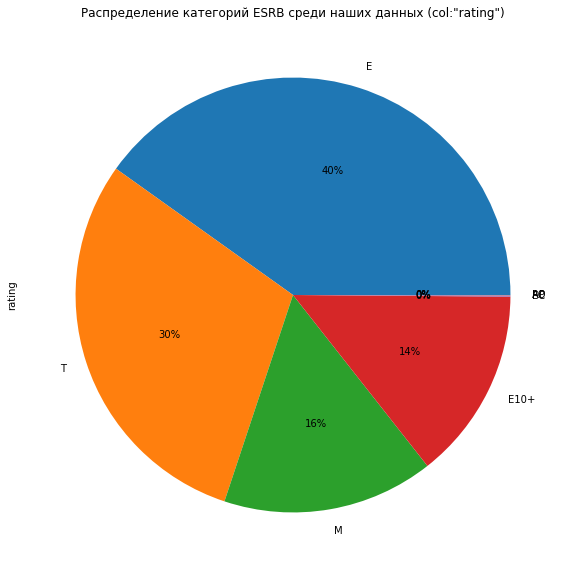

In [43]:
df['rating'].value_counts().plot.pie(
    title='Распределение категорий ESRB среди наших данных (col:"rating")', figsize=(10,10), autopct='%1.0f%%'
)
plt.show()

Сделаем замену NaN на unknown, для дальнейшего анализа

In [44]:
df['rating'] = df['rating'].fillna('Unknown')

Я решил погуглить а нет ли общего распеределения для всех видеоигр вне зависимости от платформы. Я нашёл [статью](https://www.esrb.org/blog/e-for-everyone-continues-to-be-most-frequently-assigned-video-game-rating/) в которой видно такое распределение. Из неё следует что категория E является самым частым видов выпускаемых игр а именно составляем 49% . На нашем распределение видно похожий паттерн распределения, собственно видимо нам достаточно такого числа для описания всей генеральной совокупности игр. Но это все выводы какие как мне кажется можно привести. В угадайку играть и распределять значений ESRB мне кажется не очень хорошим явлением, поэтому в данной колонке будем довольствоваться тем что есть, а значения NAN оставим в покое.

<a id = "research_data"></a>
# Шаг3. Проведение исследовательского анализа данных

Посмотрим сколько игр выпускалось в разные годы

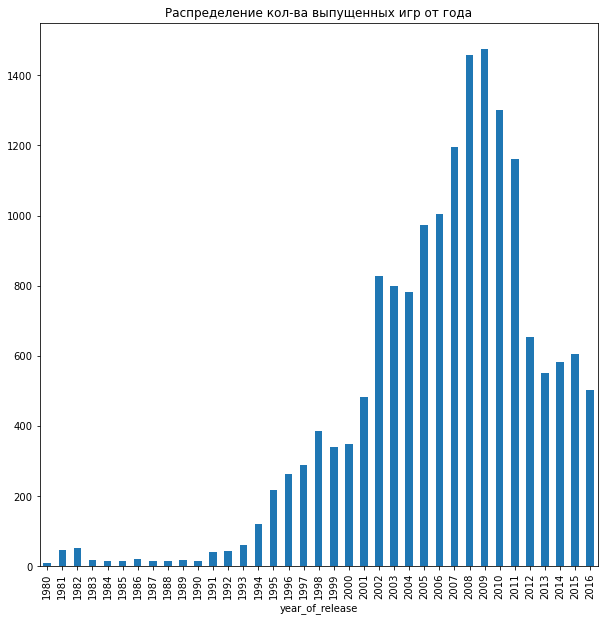

In [45]:
df.groupby('year_of_release')['name'].count().plot(
    kind='bar', figsize=(10,10), title='Распределение кол-ва выпущенных игр от года'
)

plt.show()

Отвечая на вопрос важны ли нам данные за все периоды, скорее всего нет по сути нам лишь нужно выделить некий срез данных по которым можно строить хороший прогнозы

Посмотрим как менялись продажи среди всех платформ по годам. Для этого возьмем 10 лидеров списка суммарных продаж и построим по ним распределение по годам, чтобы посмотреть продают ли на данный момент эти 10 лидеров всё также являются прибыльными и приносят денег и можно выявить лидеров по продажам за последние года, а также можно увидеть падает/убывает число проданных копий игры для каждой выбранной нами платформы 

In [46]:
ind = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).index

In [47]:
new_df = df.pivot_table(index='year_of_release', columns='platform',values = 'sum_sales', aggfunc='sum')

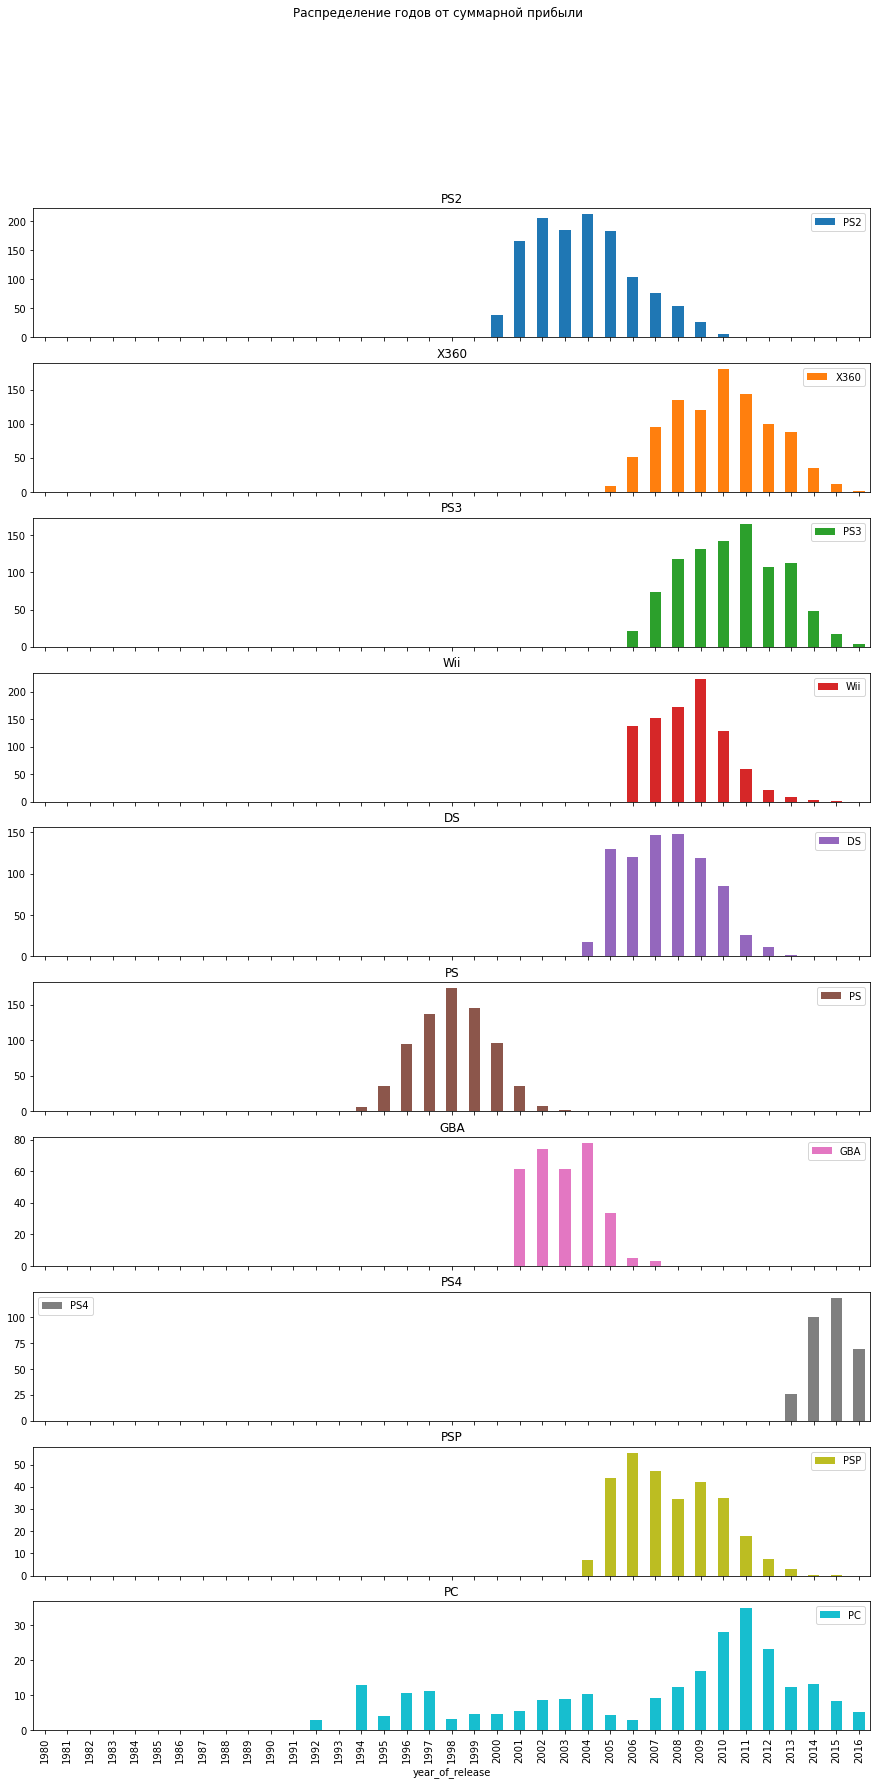

In [48]:
new_df[[i for i in ind]].dropna(axis=1, how='all').plot(
    figsize=(15,28), subplots=True, kind='bar', title='Распределение годов от суммарной прибыли')
plt.show()

Почти все 10 лидеров по продажам за весь период являются устаревшими платформами пора который уже прошла а продажи катятся стремительно вниз. Поэтому посмотрим какие платформы были лидерами не за весь период а за 2016 предыдущий год например, ведь скорее всего лидеры 2016 года скорее всего останутся лиерами до прихода более новых платформ, таким образом мы сможем ограничить круг потенциально перспективных платформ, с которыми собственно стоит работать дальше нежели со старыми данными.

In [49]:
new_df.loc[2016].dropna().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: 2016, dtype: float64

Постмотрели на продажи за 2016 год и видны фавориты: PS4, XOne, 3DS. Эти платформы являются фаворитами и превосходят ближайших конкурентов минимум на 3 порядка. Дальше посмотрим как распрелялось кол-во копий от платформ (актуальных на 2016 год) и от года.

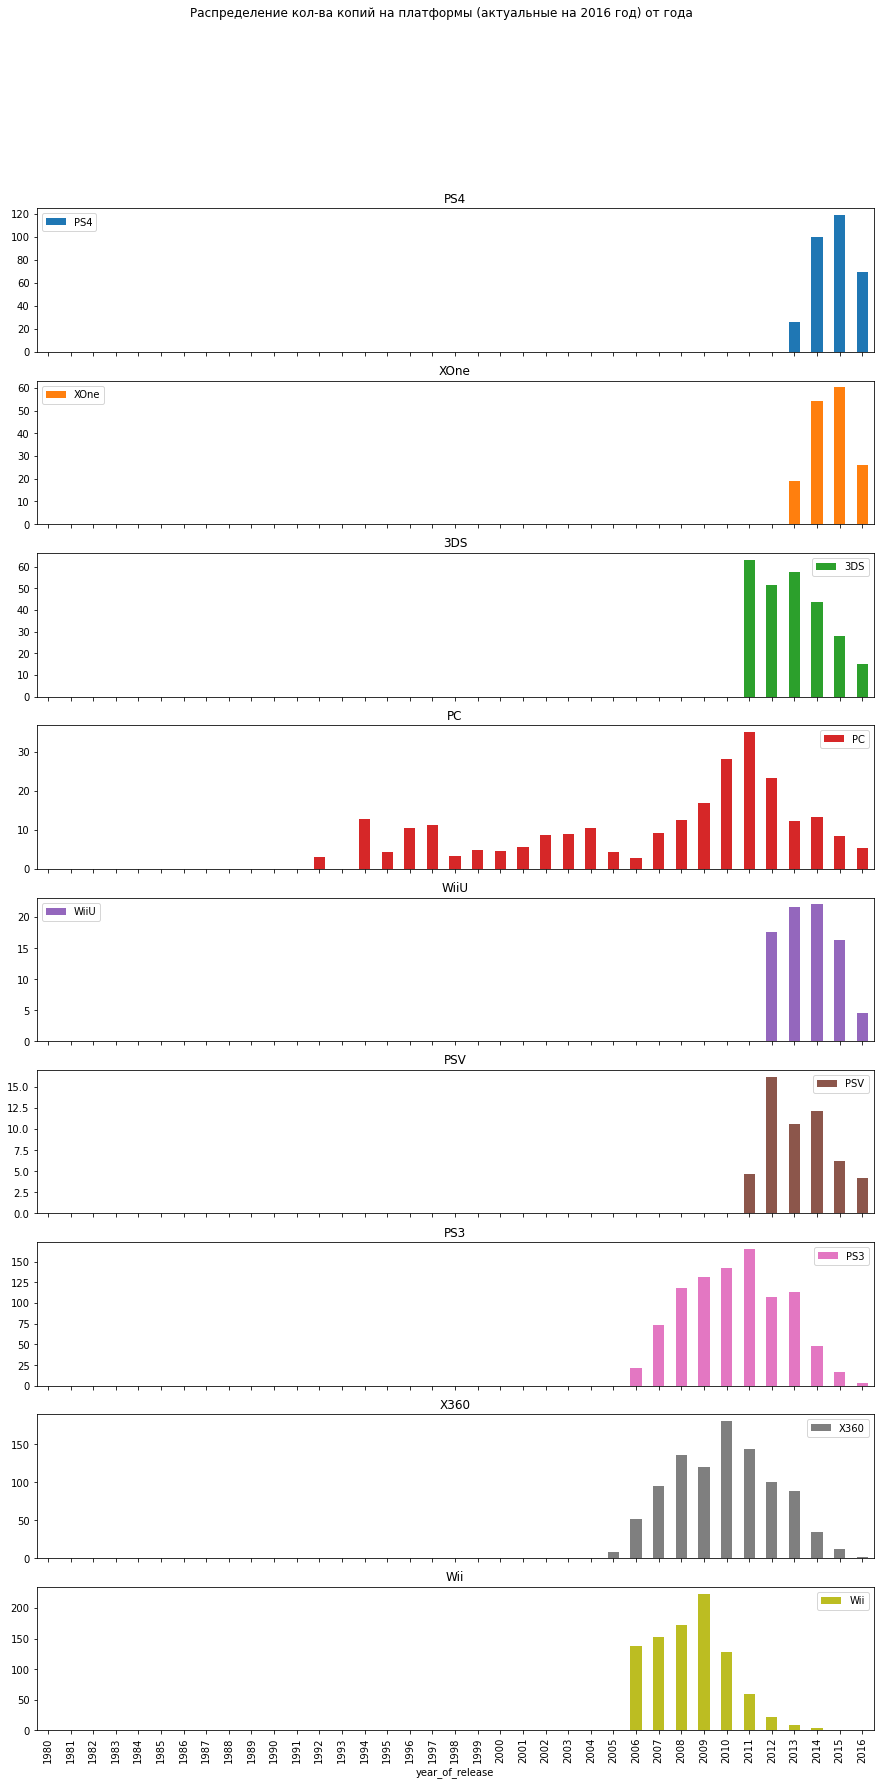

In [50]:
new_df[[i for i in new_df.loc[2016].dropna().sort_values(ascending=False).index]].dropna(axis=1, how='all').plot(
    figsize=(15,28), subplots=True, kind='bar', title='Распределение кол-ва копий на платформы (актуальные на 2016 год) от года'
)
plt.show()

Посмотрим также на дату выпуска консолей

In [51]:
year_of_platform_release = df.sort_values(by='year_of_release').pivot_table(
    index='platform', values='year_of_release', aggfunc='first').loc[
    [i for i in new_df.loc[2016].dropna().sort_values(ascending=False).index]]

In [52]:
year_of_platform_release

,year_of_release
platform,
PS4,2013
XOne,2013
3DS,2011
PC,1985
WiiU,2012
PSV,2011
PS3,2006
X360,2005
Wii,2006


Итак что мы здесь можем увидеть. Видно что некогда самые продаваемые платформы уже устарели и на смену им пришли их новые версии(так например PS3 -> PS4 , X360 -> XOne) за исключение PC, но не смотря на это игры всё также продаются и приносят прибыль на устаревших платформах. Также можно заметить что период за который платформа успевает появиться и исчезнуть составляет порядка ~ 6-8 лет судя по продажам. На момент 2016 года приносили прибыль следующие платформы: PS4, XOne, 3DS, PC, WiiU, PSV, PS3, X360, Wii. При этом самыми большими значениями продаж обладали наиболее новые платформы такие как PS4 и XOne, при этом роста по числу продаж не наблюдается ни у одной платформы. Также можно заметить на графике "Распределение кол-ва выпущенных игр от года", видно что в период до 2012 года цены достаточно сильно колеблятся, что не может не сказать на предсказательной способности данных, т.о исходя из этих выводов я предполагаю что нужно сделать актуальным периодом время от ближайшего (относительно 2016 года) момента стабилизаци рынка (т.е 2012 год) и до 2016 года включительно, что даст нам хорошие данные для дальнейших предсказаний. Таким образом наш рассматриваемый актуальный период составляет от 2012 года до 2016. 

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для этого сначала возьмём срез от данных по актуальному периоду (2012-2016) и по платформам которые приносят прибыль в 2016.

In [53]:
new_df.loc[range(2012,2017), [i for i in year_of_platform_release.index]].dropna(
    axis=1, how='all')

platform,PS4,XOne,3DS,PC,WiiU,PSV,PS3,X360,Wii
year_of_release,,,,,,,,,
2012,NaN,NaN,51.36,23.22,17.56,16.19,107.36,99.74,21.71
2013,25.99,18.96,57.76,12.38,21.65,10.59,113.25,88.58,8.59
2014,100.00,54.07,43.76,13.28,22.03,12.16,47.76,34.74,3.75
2015,118.90,60.14,27.78,8.52,16.35,6.25,16.82,11.96,1.14
2016,69.25,26.15,15.14,5.25,4.60,4.25,3.60,1.52,0.18


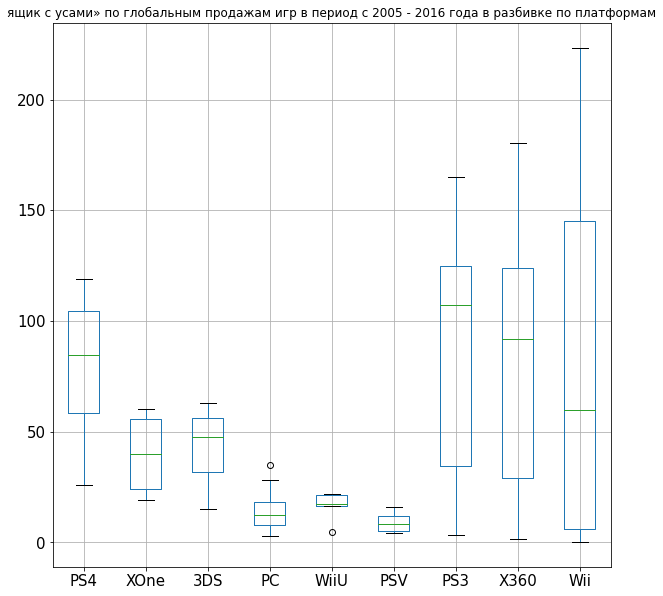

In [54]:
new_df.loc[
    range(2005,2017), [i for i in year_of_platform_release.index]].dropna(
    axis=1, how='all').boxplot(
    fontsize=15, rot=360, figsize=(10,10)
)
plt.title('ящик с усами» по глобальным продажам игр в период с 2005 - 2016 года в разбивке по платформам')
plt.show()

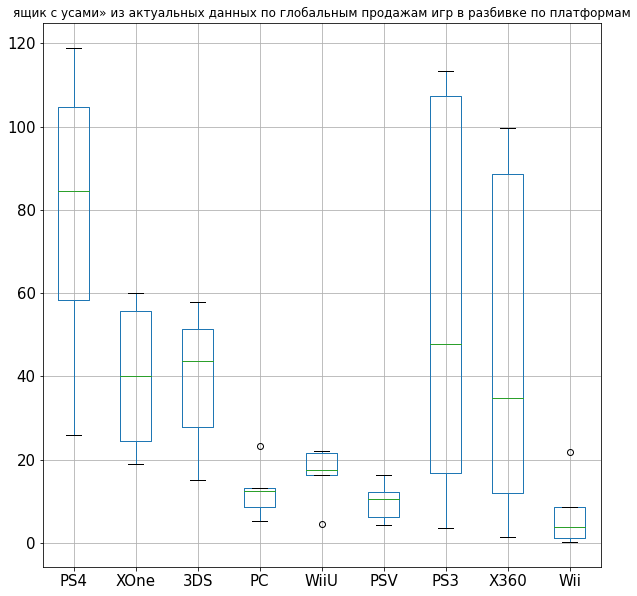

In [55]:
new_df.loc[
    range(2012,2017), [i for i in year_of_platform_release.index]].dropna(
    axis=1, how='all').boxplot(
    fontsize=15, rot=360, figsize=(10,10)
)
plt.title('ящик с усами» из актуальных данных по глобальным продажам игр в разбивке по платформам')
plt.show()

Видно что когда то такиt платформы как Wii, X360, PS3 продавали огромное кол-во копий игр. Так например Wii и вовсе больше всех копий продала за один год из промежутка с 2012 по 2017 год. Также можно заметить что число копий на новый консолях бывает больше кол-ва копий для старых платформ в болшинстве случае (как в случае с PS3,PS4,Wii,WiiU), но бывает и обратная ситуация(например X360, XOne). Скорее всего это обусловлено тем ,что Microsoft нужно подумать над своей стратегией развития так как продажи копий PS4 c XOne должны быть на ровне(судя по данным за 2012-2016 года). Давайте взглянем на диаграмму рассеяния для оценки критиков и оценки юзеров от суммарных продаж также для актуального периода. 

In [56]:
actual_df = df[(df['year_of_release'].isin(
    range(2012,2017))) & (df['platform'].isin(year_of_platform_release.index))]

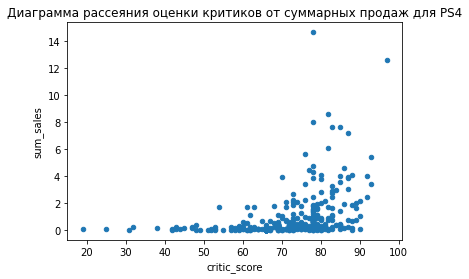

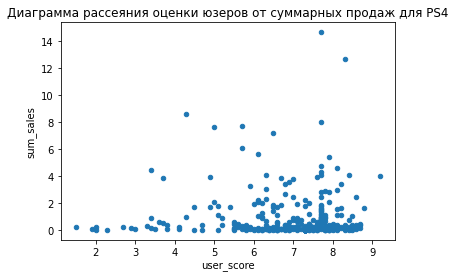

In [57]:
actual_df[actual_df['platform'] == 'PS4'].plot(
    x='critic_score',
    y='sum_sales',
    kind='scatter', 
    title='Диаграмма рассеяния оценки критиков от суммарных продаж для PS4'
)

actual_df[actual_df['platform'] == 'PS4'].plot(
    x='user_score', 
    y='sum_sales',
    kind='scatter',
    title='Диаграмма рассеяния оценки юзеров от суммарных продаж для PS4'
)

plt.show()

Посчитаем корреляцию для PS4 для параметров оценки критиков и оценки юзеров от суммарных продаж. 

In [58]:
actual_df[actual_df['platform'] == 'PS4']['sum_sales'].corr(df[df['platform'] == 'PS4']['user_score'])

-0.03711560131477587

In [59]:
actual_df[actual_df['platform'] == 'PS4']['sum_sales'].corr(df[df['platform'] == 'PS4']['critic_score'])

0.4112301476748417

Посчитаем корреляцию для PS3 для параметров оценки критиков и оценки юзеров от суммарных продаж. 

In [60]:
actual_df[actual_df['platform'] == 'PS3']['sum_sales'].corr(df[df['platform'] == 'PS3']['user_score'])

-0.06620242807267562

In [61]:
actual_df[actual_df['platform'] == 'PS3']['sum_sales'].corr(df[df['platform'] == 'PS3']['critic_score'])

0.39526947769406834

Посчитаем корреляцию для XOne для параметров оценки критиков и оценки юзеров от суммарных продаж. 

In [62]:
actual_df[actual_df['platform'] == 'XOne']['sum_sales'].corr(df[df['platform'] == 'XOne']['user_score'])

-0.08326280569524888

In [63]:
actual_df[actual_df['platform'] == 'XOne']['sum_sales'].corr(df[df['platform'] == 'XOne']['critic_score'])

0.4361809268179308

Посчитаем корреляцию для 3DS для параметров оценки критиков и оценки юзеров от суммарных продаж. 

In [64]:
actual_df[actual_df['platform'] == '3DS']['sum_sales'].corr(df[df['platform'] == '3DS']['user_score'])

0.15007258627423073

In [65]:
actual_df[actual_df['platform'] == '3DS']['sum_sales'].corr(df[df['platform'] == '3DS']['critic_score'])

0.3885045861566399

**Вывод**

Какой вывод можно сделать смотря на эти данные, например то что оценки критиков и оценки юзеров не зависят линейно от суммарных продаж, но можно сказать таким образом если у нас есть игра и её продажи высокие то скорее всего и ретинг критиков этой игры был высоким, таким образом можно выразиться так: если разработчики хотят иметь хорошие продажи то им скорее всего для этого понадобятся хорошие рейтинги от критиков. Посмотрим на общие распределения жанров среди выбранных нами игр на 2005-2017 года и по выбранным платформам

In [66]:
actual_df['genre'].value_counts().sort_values(ascending=False)

Action          954
Role-Playing    341
Sports          257
Adventure       248
Shooter         236
Misc            180
Racing          116
Fighting        105
Platform         83
Simulation       80
Strategy         67
Puzzle           24
Name: genre, dtype: int64

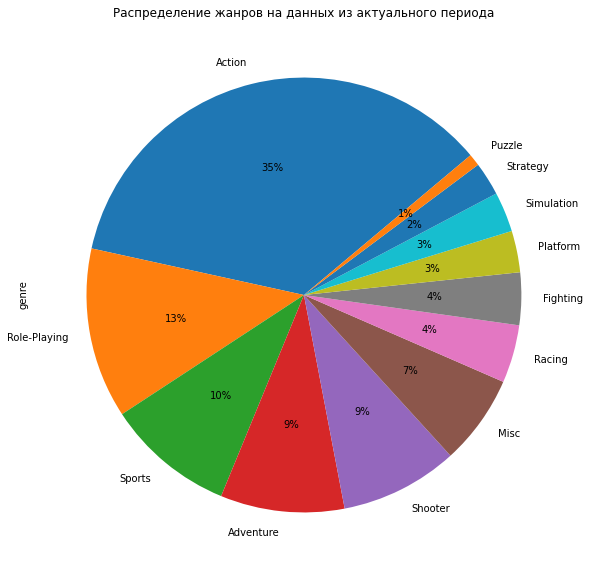

In [67]:
actual_df['genre'].value_counts().plot.pie(
    autopct='%1.0f%%',figsize=(10,10), startangle=40, title='Распределение жанров на данных из актуального периода')
plt.show()

Жанр `Action, Role-Playing, Sports, Adventure, Shooter` занимают 5 лидирующие позиции по кол-ву выпущеных игр этого жанра за период с 2012 по 2016 год. Посмотрим зависимость жанра от суммарных продаж за указанный период.

In [68]:
actual_df.pivot_table(
    index='genre', values='sum_sales', aggfunc=['sum','mean','median'])

,sum,mean,median
,sum_sales,sum_sales,sum_sales
genre,,,
Action,435.94,0.456960,0.130
Adventure,27.79,0.112056,0.040
Fighting,44.13,0.420286,0.150
Misc,84.15,0.467500,0.140
Platform,60.31,0.726627,0.210
Puzzle,4.79,0.199583,0.055
Racing,53.59,0.461983,0.135
Role-Playing,181.20,0.531378,0.160


Запишем вернюю строчку в переменную для удобства

In [69]:
types_sum_sales = actual_df.pivot_table(
    index='genre', values='sum_sales', aggfunc=['sum','mean','median'])

In [70]:
types_sum_sales['median'].sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Shooter,0.435
Sports,0.260
Platform,0.210
Role-Playing,0.160
Fighting,0.150
Misc,0.140
Racing,0.135
Action,0.130
Simulation,0.120


**Вывод**

Видно что самыми прибыльными в среднем жанрами являются :`Shooter` , `Sports`, `Platform`, `Role-Playing`, `Fighting`.

При этом самые выпускаемые жанры не всегда являются самыми прибыльными. 

<a id='portrait'></a>
# Шаг 4 Составляем портрет пользователя каждого региона (NA, EU, JP)

Посмотрим как различаются самые популярные платформы среди регионов за 2012-2016 годы

In [71]:
actual_df.groupby('platform')['jp_sales'].sum().sort_values(
    ascending=False).head()

platform
3DS     87.84
PS3     35.29
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [72]:
actual_df.groupby('platform')['eu_sales'].sum().sort_values(
    ascending=False).head()

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

In [73]:
actual_df.groupby('platform')['na_sales'].sum().sort_values(
    ascending=False).head()

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      56.15
Name: na_sales, dtype: float64

Посмотрим также на суммарные продажи только за 2016 год 

In [74]:
df[df['year_of_release'] == 2016].groupby('platform')['jp_sales'].sum().sort_values(
    ascending=False).head()

platform
3DS     8.03
PS4     5.74
PSV     3.56
PS3     1.30
WiiU    0.67
Name: jp_sales, dtype: float64

In [75]:
df[df['year_of_release'] == 2016].groupby('platform')['eu_sales'].sum().sort_values(
    ascending=False).head()

platform
PS4     31.78
XOne     9.63
PC       3.53
3DS      2.33
WiiU     1.48
Name: eu_sales, dtype: float64

In [76]:
df[df['year_of_release'] == 2016].groupby('platform')['na_sales'].sum().sort_values(
    ascending=False).head()

platform
PS4     21.49
XOne    14.27
3DS      4.14
WiiU     2.10
PC       1.36
Name: na_sales, dtype: float64

**Вывод**

Можно увидеть что в целом японский рынок, менее склонен к попупкам ,но скорее всего это обусловлено малочисленностью японии по сравнению с такими гигантами как европа и северная америка. Также видно что японцы поддерживают свой продукт(Так компании Nintendo и Sony являются японскими компаниями). В остальном видно что на остальных рынках за 2005-2016 годы лидирующие позиции делят между собой PS4 и XOne, что вполне понятно так как это  наверно самые популярные игровые платформы в мире и как раз за период с 2012-2016.Давайте теперь взгянем на популярные жарны для этих рынков.

In [77]:
actual_df.groupby('genre')['jp_sales'].sum().sort_values(
    ascending=False).head()

genre
Role-Playing    59.22
Action          49.18
Misc            12.45
Simulation      10.35
Shooter          9.23
Name: jp_sales, dtype: float64

In [78]:
actual_df.groupby('genre')['eu_sales'].sum().sort_values(
    ascending=False).head()

genre
Action          158.62
Shooter         113.49
Sports           68.84
Role-Playing     46.81
Racing           27.29
Name: eu_sales, dtype: float64

In [79]:
actual_df.groupby('genre')['na_sales'].sum().sort_values(
    ascending=False).head()

genre
Action          177.18
Shooter         144.81
Sports           81.38
Role-Playing     60.76
Misc             38.13
Name: na_sales, dtype: float64

Посмотрим также на суммарные продажи только за 2016 год 

In [80]:
df[df['year_of_release'] == 2016].groupby('genre')['jp_sales'].sum().sort_values(
    ascending=False).head()

genre
Action          7.07
Role-Playing    6.61
Adventure       1.18
Shooter         1.06
Misc            1.04
Name: jp_sales, dtype: float64

In [81]:
df[df['year_of_release'] == 2016].groupby('genre')['eu_sales'].sum().sort_values(
    ascending=False).head()

genre
Shooter         15.90
Sports          12.01
Action          10.68
Role-Playing     4.28
Racing           1.77
Name: eu_sales, dtype: float64

In [82]:
df[df['year_of_release'] == 2016].groupby('genre')['na_sales'].sum().sort_values(
    ascending=False).head()

genre
Shooter         16.24
Action           9.29
Sports           7.54
Role-Playing     5.89
Fighting         1.84
Name: na_sales, dtype: float64

**Вывод**

И снова японский рынок в период с 2012-2016 годы отличается от остальных по предпочтениям(так например в данных за 2012-2016 года видно что у японии на первом месте стоит жанр `Role-Plaing`, хотя у остальных он на последнем месте или вовсе отсутсвует), в свою очередь видно что остальные рынки достаточно схожи между собой. Такая же ситуация видна и при просмотре рынка за 2016 год. **Теперь давайте посмотрим влияет ли рейтинг ESRB на продажи.**

Япония

In [83]:
actual_df.groupby('rating')['jp_sales'].sum().sort_values(
    ascending=False).head()

rating
Unknown    95.67
E          27.62
T          25.83
M          21.20
E10+        8.19
Name: jp_sales, dtype: float64

Европа

In [84]:
actual_df.groupby('rating')['eu_sales'].sum().sort_values(
    ascending=False).head()

rating
M          193.96
E          111.81
Unknown     89.32
E10+        55.03
T           53.01
Name: eu_sales, dtype: float64

Америка

In [85]:
actual_df.groupby('rating')['na_sales'].sum().sort_values(
    ascending=False).head()

rating
M          231.57
E          113.56
Unknown    100.41
E10+        75.35
T           66.31
Name: na_sales, dtype: float64

За данные с 2012-2016 года видно никую разницы между влиянием рейтинга ESRB и суммарными продажами в отдельном регионе. Так сразу бросается в глаза что Япония склонна к попупке игр с рейтингом 'unknown', скорее всего это обусловлено просто самим рынком. Что я имею ввиду, Японцы достаточно необычные сами по себе и любят достаточно странные игры, которые в других частях мира могут остаться просто незамеченными. Из этого ещё можно также сделать вывод что не заполняются малоизвестные игры, вследствие этого возникают пропуски в рейтинге и юзер скоре. Но вообще тенденция на остальных рынках то что продукты категории E и M покупаются чаще нежели остальные категории. Посмотрим также данные за 2016 год.

In [86]:
df[df['year_of_release'] == 2016].groupby('rating')['jp_sales'].sum().sort_values(
    ascending=False).head()

rating
Unknown    14.32
T           2.27
M           1.20
E           1.07
E10+        0.45
Name: jp_sales, dtype: float64

In [87]:
df[df['year_of_release'] == 2016].groupby('rating')['eu_sales'].sum().sort_values(
    ascending=False).head()

rating
M          16.54
E          13.61
T           9.79
Unknown     7.47
E10+        3.81
Name: eu_sales, dtype: float64

In [88]:
df[df['year_of_release'] == 2016].groupby('rating')['na_sales'].sum().sort_values(
    ascending=False).head()

rating
M          15.67
T           8.95
Unknown     8.53
E           7.97
E10+        3.81
Name: na_sales, dtype: float64

В данных за 2016 год также таковой нет разницы между суммарной продажей в отдельном регионе и рейтингом ESRB. Все лидирующие позиции по продажам делят одни и те же кпозицииатегории, но лидирующие позиции разделяют разные значения рейтингов.  

**Вывод шаг 4**

Исходя из полученные данных какие можно сделать выводы.

1) Японский рынок склонен к покупкам своих товаров(т.е какой нибудь Xbox там совсем имеет низкие продажи). 

2) Наиболее прибыльными являются американский и европейский рынки

3) Японцам предпочтительней жанр `Role-playing` в отличие от предпочтений на других рынках где предпочтения игроков почти схожи между собой 

4) Самым продаваемый рейтинг во всех странах (кроме японии) `E`.

5) На момент 2016 года самыми популярными платформами в японии являются `3DS` `PS4` в отличие от других рынков где лидирубщие позиции делят между собой `PS4` и `XOne`

6) Причина которой может быть обусловлены пропуски в `user_score` и `rating` может быть обусловлена тем что эти игры нацелены на опреленные рынки, за пределы которых они не выходят=> Вследствие этого такие игры остаются известными локально, и поэтому я бы такие не стал заполнять, ибо на эти данные вряд ли будут смотреть

7) Япония склонна к покупкам 'странных' игр в какой то степени исходя из вывода 6). Вряд ли даже настоящие рейтинги будут сильно отличаться, но так как они покупают что то необычное, то из за этого возникает перевес рейтинга 'unknown' именно в Японии.

8) Ну и вообще японский игровой рынок отличается немного от остальных(наверно вследствие того что является сама технологическим лидером в этой области и в какой то степени диктует моду)

<a id='check_hypo'></a>
# Шаг 5. Проверка гипотез

Проверяем гипотезу 1: **Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые**


Тест двухсторонний так как нам не важно кто больше важно лишь признать факт разницы. Далее пытаемся провести о равенстве средних двух генеральных совокупностей. В данном случае считаем дисперсии равными. Формулировка гипотезы выглядит как представленно ниже. 

H0 : med1 - med2 = 0

H1 : |med1 - med2| > 0

Формулировка гипотезы H0: средний пользовательский рейтинг платформ Xbox One и PC равен друг другу (Сверху как раз я это и пишу ведь если среднее это med1 и med2 для двух ген.совокупностей тогда med1=med2=A => med1 - med2 = 0; и это как раз формулировка H0)

Формулировка альтернативной гипотезы H1: средний пользовательский рейтинг платформ Xbox One и PC отличается(т.е не важно в какую строну, главное что медианы различные и как раз |med1 - med2| > 0 , здесь модуль поэтому неважно куда отклонится отклонится главное что > 0)

Посчитаем среднее и стандартное отклонение для данных платформ

**XOne**

In [89]:
np.std(actual_df[actual_df['platform'] == 'XOne']['user_score'])

1.243830123736723

In [90]:
np.mean(actual_df[actual_df['platform'] == 'XOne']['user_score'])

6.748582995951404

**PC**

In [91]:
np.std(actual_df[actual_df['platform'] == 'PC']['user_score'])

1.5486518524187411

In [92]:
np.mean(actual_df[actual_df['platform'] == 'PC']['user_score'])

6.591199999999991

In [93]:
results = st.ttest_ind(
    actual_df[actual_df['platform'] == 'XOne']['user_score'], 
    actual_df[actual_df['platform'] == 'PC']['user_score']
)

Здесь считает значение значение t-test'a с помощью метода `ttest_ind`. Передаю на вход юзер скоры от срезов по платформам. Уровень значимости берем как 0.05 т.к гипотеза друхсторонняя.

In [94]:
if 0.05 > results.pvalue:
    print( 'p-value =',results.pvalue , ",Отвергаем H0 гипотезу")
else:
    print('Принимаем H0 ')

Принимаем H0 


**Вывод по "Гипотеза 1"**

Статистически доказано что средний пользовательский рейтинг платформ Xbox One и PC за актуальный период не отличается. И это даже видно на полученных средних и стандартных отклонениях они достаточно похожи друг на друга.

Проверяем гипотезу 2: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**


Тест двухсторонний так как нам не важно кто больше важно лишь признать факт разницы. Далее пытаемся провести о равенстве средних двух генеральных совокупностей. В данном случае считаем дисперсии равными. Формулировка гипотезы выглядит как представленно ниже. 

H0 : med1 - med2 = 0

H1 : |med1 - med2| > 0

Формулировка гипотезы H0: средний пользовательский рейтинг жанров Action и Sports равен друг другу (Сверху как раз я это и пишу ведь если среднее это med1 и med2 для двух ген.совокупностей тогда med1=med2=A => med1 - med2 = 0; и это как раз формулировка H0)

Формулировка альтернативной гипотезы H1: средний пользовательский рейтинг платформ Xbox One и PC отличается(т.е не важно в какую строну, главное что медианы различные и как раз |med1 - med2| > 0 , здесь модуль поэтому неважно куда отклонится отклонится главное что > 0)

Посчитаем среднее и стандартное отклонение для данных платформ

**Action**

In [95]:
np.std(actual_df[actual_df['genre'] == 'Action']['user_score'])

1.0421027118941422

In [96]:
np.mean(actual_df[actual_df['genre'] == 'Action']['user_score'])

7.067190775681421

**Sports**

In [97]:
np.std(actual_df[actual_df['genre'] == 'Sports']['user_score'])

1.7087325243496954

In [98]:
np.mean(actual_df[actual_df['genre'] == 'Sports']['user_score'])

5.926459143968861

In [99]:
results  = st.ttest_ind(
    actual_df[actual_df['genre'] == 'Action'][['user_score']], 
    actual_df[actual_df['genre'] == 'Sports'][['user_score']]
)

In [100]:
results.pvalue

array([4.88049098e-38])

In [101]:
if 0.05 > results.pvalue:
    print( 'p-value =',results.pvalue , ",Отвергаем H0 гипотезу")
else:
    print('Принимаем H0 ')

p-value = [4.88049098e-38] ,Отвергаем H0 гипотезу


**Вывод по "Гипотеза 2"**

Средний пользовательский рейтинг жанров Action и Sports отличается друг от друга, на основание статистического теста с уровнем значимости 5%. Причём по всей видимости больше значения у жанра `Action`, на основание среднего и стандартного отклонения для представленных выше двух жанров

<a id = 'common_out'></a>
# Шаг 6: Общий вывод

**Вывод**

Собственно сначала данные были достаточно засоренные NAN-ами, пришлось сначала их чистить путём подставления соответсвующих значений по колонкам. Все колонки были заменены за исключением колонки `rating` так как не нашлось каких то зависимостей значения этой колонки от других колонок, но и правда ради того кол-ва что у нас есть вполне хватит для проведения стат.тестов. По результатам анализа данных делается вывод что оценки критиков и оценки юзеров не зависят линейно от суммарных продаж, но можно сказать таким образом :если у нас есть игра и её продажи высокие то скорее всего и ретинг критиков этой игры был высоким.Или например так: если разработчики хотят иметь хорошие продажи то им скорее всего для этого понадобятся хорошие рейтинги от критиков.Жанр Action, Role-Playing, Sports, Adventure, Shooter занимают 5 лидирующих позиций по кол-ву выпущеных игр этого жанра за актуальный период. Видно что самыми прибыльными в среднем жанрами являются :Shooter , Sports, Platform, Role-Playing, Fighting. Также в актуальный период таковой нет разницы между суммарной продажей в отдельном регионе и рейтингом ESRB. Все лидирующие позиции по продажам делят одни и те же категории, но лидирующие позиции по числу выпущенный игр данной категории разделяют разные значения рейтингов. 

Самыми прибыльными платформами являются PS4, XOne, 3DS, с огромным отставанием от всех PS4 которая продаёт больше всех. 



Также видно что Японский рынок отличается немного от других рынков, потому что как мне кажется они склонны покупать более 'странные' или менее известные игры. Наиболее перспективными платформами являются PS4,XOne,PS3 для Северной Америки и Европы, если таргетироваться на Японию то PS4 3DS и PSV. Таким образом видно что Playstation доминирует на всех рынках. 


И снова японский рынок в период с 2012-2016 годы отличается от остальных по предпочтениям в жанрах(так например в данных за 2012-2016 года видно что у японии на первом месте стоит жанр `Role-Plaing`, хотя у остальных он на последнем месте или вовсе отсутсвует), в свою очередь видно что остальные рынки достаточно схожи между собой. Такая же ситуация видна и при просмотре рынка за 2016 год.


Можно увидеть что в целом японский рынок, менее склонен к попупкам ,но скорее всего это обусловлено малочисленностью японии по сравнению с такими гигантами как европа и северная америка. Также видно что японцы поддерживают свой продукт(Так компании Nintendo и Sony являются японскими компаниями). В остальном видно что на остальных рынках за 2005-2016 годы лидирующие позиции делят между собой PS4 и XOne, что вполне понятно так как это  наверно самые популярные игровые платформы в мире и как раз за период с 2012-2016


Вообщем желательно чтобы игра была с хорошим рейтигом, была из перечня жанров: Shooter , Sports, Platform, Role-Playing, Fighting. Также нужно смотреть на потенциальный рынок игры ведь можно выпустить для Японии и иметь хорошие продажи а во всё остальном мире проажи будут не очень. Ну и хорошо бы чтобы сама игры была хорошая обьективно) Это все параметры которые мне удалось вроде выявить для успеха. 